演習前の準備．  
本演習前に 必要なライブラリをインストールしておく．  
具体的には 以下のコマンドをターミナルから実行しておく．
```
conda install pandas  
conda install numppy
```


# Python を用いたデータ解析演習   
YouBalance が出力する Wii Baalnce Board の計測データを matplotlib と pandas で可視化する．   

* [matplotlib](https://matplotlib.org/): データの可視化や図の作成に使える Python のライブラリの一つ  
* [pandas](https://pandas.pydata.org/): Python によるデータ解析を支援するライブラリ． 数表や時系列データの操作のためによく用いられる．

## CoP の散布図はどう役に立つのか  

重心動揺の総軌跡長と矩形面積はバランス能力を評価するうえで医学的に重要な指標である[1]   
[1]: 望月，峯島：重心動揺を用いた姿勢安定度評価指標の信頼性および妥当性，理学療法学，Vol.27，No.6 (2000)，pp.199-203


## 演習

### 使用するライブラリの読み込み

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### CoP の計測データを読み込む  
YouBalance で計測した Wii Balance Board のデータは    "ファイル名_**wbb**.csv"  という名前で保存されている．  

まずはデータが格納されている位置をプログラムに与える準備をする．  
`os.path.join` 関数を使って完全な path を作成する．

注: 以下の path にある 「../」 は現在のディレクトリ(位置)の一つ上を意味する．

In [107]:
# path = '../sample_data/Static_stand/0022__20160406_1008_16_wbb.csv'
# 以下のコードは↑のコードとおなじ結果になる．

import os
directory = '../sample_data/Static_stand/' # ファイル名_wbb.csv が保存されているディレクトリ
file_name = '0022__20160406_1008_16_wbb.csv' # 読み込みたい ファイル名
path = os.path.join(directory, file_name)

↑で用意した path を  pandasの関数  
'pd.read_csv()' に与えて読み込む．  
(読み込んだデータは `wbb_data` という変数に格納する．)

In [108]:
wbb_data = pd.read_csv(path)

`wbb_data` に格納されたデータを確認してみる  

In [109]:
wbb_data

,frames,time_elasped,mark,total,w_tl,w_tr,w_bl,w_br,COP_X,COP_Y,Goal_X,Goal_Y
0,2,32,0,0.019758,-0.010131,0.039650,-0.020083,0.010322,85.22580,23.856500,0,0
1,3,32,0,-0.353372,-0.070918,-0.029738,-0.190786,-0.061931,-10.10480,-5.163770,0,0
2,4,68,0,-0.353372,-0.070918,-0.029738,-0.190786,-0.061931,-10.10480,-5.163770,0,0
3,5,100,0,-0.061222,0.101311,0.079300,-0.210868,-0.030965,-54.15890,-82.802200,0,0
4,6,132,0,0.119669,0.202622,0.158601,-0.220910,-0.020644,27.41830,60.444100,0,0
5,7,168,0,0.079639,0.283671,0.138775,-0.291199,-0.051609,24.97020,115.309000,0,0
6,8,204,0,0.139888,0.405244,0.178426,-0.371530,-0.072253,10.87750,88.138200,0,0
7,9,236,0,0.320538,0.496424,0.247813,-0.351447,-0.072253,2.00369,43.724100,0,0
8,10,268,0,0.060375,0.344458,0.138775,-0.381571,-0.041287,46.81820,180.093000,0,0
9,11,304,0,-0.092070,0.192491,0.089213,-0.291199,-0.082574,-24.02830,-85.432400,0,0


データの先頭 5件のみを確認したいときは以下のようにする  
pandas の `head()` 関数を呼びだす

In [110]:
wbb_data.head(5)

,frames,time_elasped,mark,total,w_tl,w_tr,w_bl,w_br,COP_X,COP_Y,Goal_X,Goal_Y
0,2,32,0,0.019758,-0.010131,0.039650,-0.020083,0.010322,85.2258,23.85650,0,0
1,3,32,0,-0.353372,-0.070918,-0.029738,-0.190786,-0.061931,-10.1048,-5.16377,0,0
2,4,68,0,-0.353372,-0.070918,-0.029738,-0.190786,-0.061931,-10.1048,-5.16377,0,0
3,5,100,0,-0.061222,0.101311,0.079300,-0.210868,-0.030965,-54.1589,-82.80220,0,0
4,6,132,0,0.119669,0.202622,0.158601,-0.220910,-0.020644,27.4183,60.44410,0,0


### CoP のデータを散布図として表示してみる．  
matplotlib の `scatter()` 関数を使う．    

まず最初に `wbb_data` の中から COP_X と COP_Y の列のデータと経過時間のデータ(time_elapsed)を抜き出したい．  
このようなときには pandas の `.loc` を呼び出すと良い． [参考サイト](https://note.nkmk.me/python-pandas-at-iat-loc-iloc/)

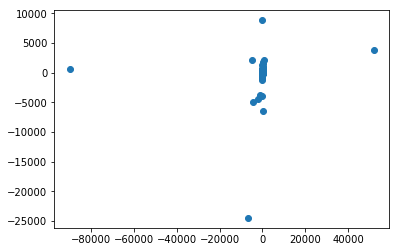

In [114]:
%matplotlib inline

target_list = ['COP_X', 'COP_Y', 'time_elasped'] # 抜き出したい列の名前をリストに纏める
subset = wbb_data.loc[:, target_list]
x = subset.COP_X # x座標の時系列データ
y = subset.COP_Y # y座標の時系列データ

plt.scatter(x, y)
plt.savefig('scatter_1.png')

↑の散布図では 上下左右の端にあるデータの影響で分布が小さく表示されている．  

今，全ての時刻のデータを単純に描画したが，このデータは  
YouBalance の計測機能有効化時から 57秒経過後  ~ 87秒経過後 で開眼時のCoP を，  
YouBalance の計測機能有効化時から 98.8秒経過後 ~ 128.8 秒経過後で閉眼時のCoP を計測したものである．  
  
 `wbb_data` のデータを時系列で区切り，開眼時の計測データ，閉眼時の計測データを別の色で描画する．   
 
 YouBalance の音声案内のタイミング   
 
 |time_elasped    | 案内内容     |
 |----------------|--------------|
 |57000 (57秒)    | 開眼・開始音 |
 |87000 (87秒)    | 開眼・終了音 |
 |98800 (98.8秒)  | 閉眼・開始音 |
 |128800 (128.8秒)| 閉眼・終了音 |
 |130500 (130.5秒)| 計測終了     |

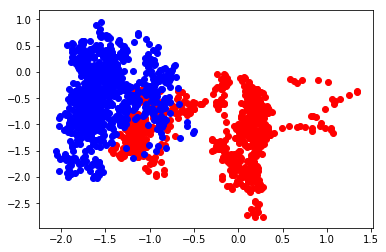

In [115]:
# YouBalance の出力するファイルでは ミリ秒単位で経過時間が記録されているので
# 57 [秒]は 57000 という表記になる．
open_eyes = subset[ (57000 < subset.time_elasped) & (subset.time_elasped < 87000)]

x = open_eyes.COP_X
y = open_eyes.COP_Y

plt.scatter(x,y,edgecolors='red',c='red')

close_eyes = subset[(98800 < subset.time_elasped) & (subset.time_elasped < 128800)]
x = close_eyes.COP_X
y = close_eyes.COP_Y

plt.scatter(x, y, edgecolors='blue',c='blue')

ついでに open_eyse と close_eyes への切り出しを関数化しておく．  
(後で同じ操作を行う際に便利)

In [133]:
def divide_open_close(subset):
    open_eyes = subset[ (57000 <= subset.time_elasped) & (subset.time_elasped <= 87000)]
    close_eyes = subset[(98800 <= subset.time_elasped) & (subset.time_elasped <= 128800)]
    return open_eyes, close_eyes

### 総軌跡長の導出  
総軌跡長について  
- JIS規格 : https://github.com/ShibataLab/enPit_Lecture.git  

In [1]:
path = './figure/body_sway.png'

'H:\\Project\\enPit_Lecture'

<img src="http://i.imgur.com/Jjwsc.jpg" alt="エビフライトライアングル" title="サンプル">

導出法
  
frame 1 の点と frame 2の点の距離，frame 2と frame 3 の距離と全ての点について時系列を追って距離を足し合わせると総軌跡長が得られる．  
![body_sway](figure\body_sway.png)  
  
  
2点間の距離は以下の様にして求められる  
![euclid_distance](figure\euclid_distance.png)  
  
この計算を 最初の frame から 最後の frame まで繰り返せばよい．  

ヒント: `np.linalg.norm` 関数に ((frame1 の座標) - (frame2 の座標)) を与えると直線距離が出てくる  

In [118]:
import numpy as np
def calc_body_sway(point):
    """総軌跡長を導出する．引数は2次元平面座標"""
    point_vec = point - point.shift(1)
    point_vec = point_vec.fillna(0)
    body_sway = 0 # 値が 0の変数を用意しておく．
    for i, row in point_vec.iterrows():
        body_sway += np.linalg.norm(row) # 2点の距離を足していく．
    return body_sway

In [2]:
import numpy as np
np.linalg.norm?

In [119]:
# 確認用コード
#確認
x = [1,2,3,-1]
y = [1,2,2,2]
point = pd.DataFrame({'x':x,
                      'y':y})
calc_body_sway(point) # 5+sqrt(2)なら正常

6.4142135623730949

開眼時の総軌跡長を求める．  

In [123]:
data_point = open_eyes[['COP_X', 'COP_Y']]
body_sway_len = calc_body_sway(data_point)
print('総軌跡長は ', body_sway_len, 'です')

総軌跡長は  62.7989121057 です


### 四分位数

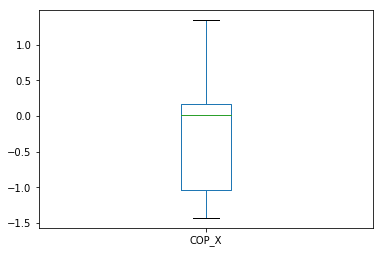

In [161]:
open_eyes.COP_X.plot.box()

In [175]:
# open_eyes.describe()
open_eyes.describe().iloc[:,:2]


,COP_X,COP_Y
count,899.000000,899.000000
mean,-0.300654,-1.098460
std,0.625355,0.524610
min,-1.431470,-2.764130
25%,-1.041010,-1.417825
50%,0.009959,-1.078250
75%,0.175389,-0.685253
max,1.344500,-0.040302


### 数日間分のデータをまとめて解析してみる．

一旦，便利な関数を定義する  
この関数では指定したディレクトリから特定の利用者のデータのみを見つけ出し，  
そのパスを返す．  
0022__20160406_1008_16_wbb.csv と同じ被験者のデータが欲しい場合は id として 0022 を指定すればよい

In [131]:
import glob
def get_files_fromID(id, target_path):
    """特定の被験者IDのデータを取得"""   
    wbb_files = glob.glob(target_path + '/' + id + '*_wbb.csv')
    return wbb_files

In [132]:
print(directory)
get_files_fromID(id='0022', target_path=directory)

../sample_data/Static_stand/


['../sample_data/Static_stand\\0022__20160406_1008_16_wbb.csv',
 '../sample_data/Static_stand\\0022__20160408_0950_51_wbb.csv',
 '../sample_data/Static_stand\\0022__20160413_1011_45_wbb.csv',
 '../sample_data/Static_stand\\0022__20160415_0943_01_wbb.csv',
 '../sample_data/Static_stand\\0022__20160508_1145_00_wbb.csv']

↑のリストのように 5つのファイルへのパスが得られる．

In [149]:
# パス一覧を変数 wbb_files に格納する
wbb_files = get_files_fromID(id='0022', target_path=directory)

# wbb_files の一番目の path でアクセスできるデータを読み込む


# open_eyes と close_eyse にデータを分ける

In [150]:
def calc_rectangle(points):
    x = points.COP_X.max() - points.COP_X.min()
    y = points.COP_Y.max() - points.COP_Y.min()
    return x * y

def get_filename(file_path):
    """ 拡張子やパスを含まないファイル名を返す．
    """
    file_full_name = file_path.split('\\')
    file_name = file_full_name[1].split('.')[0]
    return file_name

def create_dataset(wbb_files):

    date = []
    o_BS_len = []
    o_rectangle = []
    o_ml_ave = []
    o_ml_std = []
    o_ap_ave = []
    o_ap_std = []


    for i in range(0, len(wbb_files)):
        dataset = pd.read_csv(wbb_files[i])
        open_eyes, _ = divide_open_close(dataset)

        # 計測日
        date.append(get_filename(wbb_files[i]).split('_')[2])

        # 総軌跡長の導出
        point = open_eyes[['COP_X', 'COP_Y']]
        o_BS_len.append(calc_body_sway(point))

        # 矩形面積の導出
        o_rectangle.append(calc_rectangle(open_eyes))

        # ML平均
        o_ml_ave.append(open_eyes.COP_X.mean())
        # ML 標準偏差
        o_ml_std.append(open_eyes.COP_X.std())
        # AP平均
        o_ap_ave.append(open_eyes.COP_Y.mean())
        # AP標準偏差
        o_ap_std.append(open_eyes.COP_Y.std())

    # データセットの作成
    dataset = pd.DataFrame(
                 {'date':date,
                  'body_sway_len':o_BS_len,
                  'rectangle':o_rectangle,
                  'ML_ave':o_ml_ave,
                  'ML_std':o_ml_std,
                  'AP_ave':o_ap_ave,
                  'AP_std':o_ap_std},
                  columns=['date','body_sway_len', 'rectangle', 'ML_ave', 'ML_std', 'AP_ave', 'AP_std'])
    
    return dataset

user id 0010 の被験者のデータを読み込む

In [151]:
wbb_files = get_files_fromID('0010', target_path=directory)
dataset = create_dataset(wbb_files)
dataset

,date,body_sway_len,rectangle,ML_ave,ML_std,AP_ave,AP_std
0,20160405,90.837823,7.580290,-1.385441,0.246870,-1.521556,0.980229
1,20160412,78.646615,4.706462,-0.860500,0.192527,-1.365504,0.867164
2,20160419,169.881217,129.919202,-2.081503,2.236136,-1.679863,1.419297
3,20160503,62.540213,4.661652,-1.893726,0.234792,-1.647994,0.576835
4,20160510,49.202256,2.572658,-1.418897,0.232267,-0.685325,0.491496


### 総軌跡長と矩形面積の変化を確認する

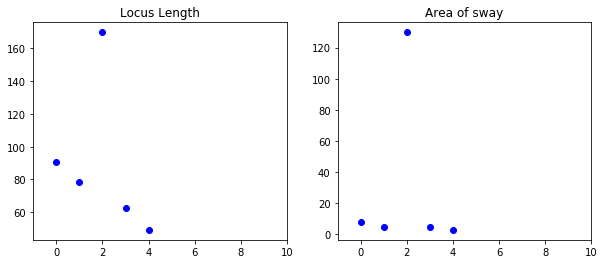

In [152]:
# 総軌跡長
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

x = dataset.index.values
y = dataset.body_sway_len

plt.plot(x,y, 'bo')
plt.xlim(-1, 10)
plt.title('Locus Length')

# 矩形面積
plt.subplot(1,2,2)
y = dataset.rectangle

plt.plot(x,y, 'bo')
plt.xlim(-1, 10)
plt.title('Area of sway')


### 四分位数の確認

In [154]:
def plot_copX_box(wbb_files):
    # 箱ひげ図
    df = pd.DataFrame() # COP_Xの値を格納するデータフレーム
    for i in range(0, len(wbb_files)):
        dataset = pd.read_csv(wbb_files[i])
        open_eyes, _ = divide_open_close(dataset)

        column_name = 's' + str(i)
        df[column_name] = open_eyes.COP_X


    df.plot.box()
    xticks = df.columns.values
    #plt.xticks([i for i in range(1, len(wbb_files)+1)],xticks)
    plt.grid()
    plt.ylabel('COP_X')

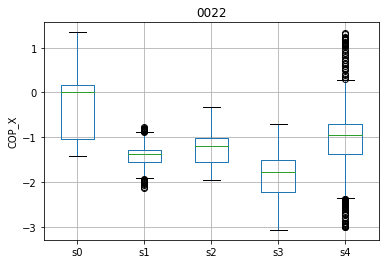

In [160]:
subject_id = '0022'
wbb_files = get_files_fromID(subject_id, target_path=directory)
plot_copX_box(wbb_files)
plt.title(subject_id)
plt.show()